# Proyecto Superstore Sales Dataset

## Importar librerias

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import textwrap
import warnings
warnings.filterwarnings('ignore')

## Cargar archivo

In [5]:
# Leer archivo csv
df = pd.read_csv(r'C:\Users\ASUS\Desktop\Superstore_python_analysis\data\raw\train.csv')
df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


## Exploración inicial de datos

In [7]:
# Exploración de datos
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [8]:
# Verificar posibles duplicados
df.duplicated().sum()

0

In [9]:
# Verificar nulos
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

# Normalizar nombres columnas

In [11]:
df.columns = (
    df.columns
    .str.lower()
    .str.replace(" ", "_")
    .str.replace("-", "_")
)

df.columns

Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'country', 'city', 'state',
       'postal_code', 'region', 'product_id', 'category', 'sub_category',
       'product_name', 'sales'],
      dtype='object')

In [12]:
# Cambiar tipo de dato de fecha a datetime
df['order_date'] = pd.to_datetime(df['order_date'], dayfirst=True, errors='coerce')
df['ship_date'] = pd.to_datetime(df['ship_date'], dayfirst=True, errors='coerce')

## Crear columnas nuevas

In [14]:
# Sacar percentiles para las categorias bajo y medio
segmento_bajo = df["sales"].quantile(0.33)
segmento_medio = df["sales"].quantile(0.67)

# Función para ingresar etiquete en cada fila

def segmentar (sales):
    if sales <= segmento_bajo:
        return 'Bajo'
    elif sales <= segmento_medio:
        return 'Medio'
    else:
        return 'Alto'

df["segmento_venta"] = df["sales"].apply(segmentar)

In [15]:
# extraer año, mes y dia de order_date
df["order_date_year"] = df["order_date"].dt.year #Extraer año
df["order_date_month"] = df["order_date"].dt.month # Extraer mes
df["order_date_day"] = df["order_date"].dt.day # Extraer dia

## Exploración final de datos

In [17]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   row_id            9800 non-null   int64         
 1   order_id          9800 non-null   object        
 2   order_date        9800 non-null   datetime64[ns]
 3   ship_date         9800 non-null   datetime64[ns]
 4   ship_mode         9800 non-null   object        
 5   customer_id       9800 non-null   object        
 6   customer_name     9800 non-null   object        
 7   segment           9800 non-null   object        
 8   country           9800 non-null   object        
 9   city              9800 non-null   object        
 10  state             9800 non-null   object        
 11  postal_code       9789 non-null   float64       
 12  region            9800 non-null   object        
 13  product_id        9800 non-null   object        
 14  category          9800 n

row_id               0
order_id             0
order_date           0
ship_date            0
ship_mode            0
customer_id          0
customer_name        0
segment              0
country              0
city                 0
state                0
postal_code         11
region               0
product_id           0
category             0
sub_category         0
product_name         0
sales                0
segmento_venta       0
order_date_year      0
order_date_month     0
order_date_day       0
dtype: int64

## Exportar tabla limpia

In [19]:
df.to_csv(r'C:\Users\ASUS\Desktop\Superstore_python_analysis\data\processed\train_limpio.csv', index=False)

## Análisis exploratorio

In [21]:
# Ventas por productos - top 10
venta_por_producto = df.groupby("product_name")["sales"].sum().sort_values(ascending=False).head(10)
venta_por_producto

product_name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
GBC Ibimaster 500 Manual ProClick Binding System                               19024.500
Hewlett Packard LaserJet 3310 Copier                                           18839.686
HP Designjet T520 Inkjet Large Format Printer - 24" Color                      18374.895
GBC DocuBind P400 Electric Binding System                                      17965.068
High Speed Automatic Electric Letter Opener                                    17030.312
Name: sales, dtype: float64

In [22]:
# % Ventas por productos - top 10
porc_venta_por_producto = round((venta_por_producto / df["sales"].sum()) * 100,2).sort_values(ascending=False).head(10)
porc_venta_por_producto

product_name
Canon imageCLASS 2200 Advanced Copier                                          2.72
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    1.21
Cisco TelePresence System EX90 Videoconferencing Unit                          1.00
HON 5400 Series Task Chairs for Big and Tall                                   0.97
GBC DocuBind TL300 Electric Binding System                                     0.88
GBC Ibimaster 500 Manual ProClick Binding System                               0.84
Hewlett Packard LaserJet 3310 Copier                                           0.83
HP Designjet T520 Inkjet Large Format Printer - 24" Color                      0.81
GBC DocuBind P400 Electric Binding System                                      0.79
High Speed Automatic Electric Letter Opener                                    0.75
Name: sales, dtype: float64

In [23]:
# Top 5 estados donde mas se vendió el producto Canon imageCLASS 2200 Advanced Copier
filtro_producto = df[df["product_name"] == 'Canon imageCLASS 2200 Advanced Copier']

top_5_canon_imageCLASS = filtro_producto.groupby("state")["sales"].sum().sort_values(ascending=False).head(5)

top_5_canon_imageCLASS

state
Indiana         17499.950
Washington      13999.960
New York        11199.968
Delaware        10499.970
Pennsylvania     8399.976
Name: sales, dtype: float64

In [24]:
# Ventas por estado - top 10
venta_por_estado = df.groupby("state")["sales"].sum().sort_values(ascending=False).head(10)
venta_por_estado
print("Top 10 estados:", venta_por_estado)

Top 10 estados: state
California      446306.4635
New York        306361.1470
Texas           168572.5322
Washington      135206.8500
Pennsylvania    116276.6500
Florida          88436.5320
Illinois         79236.5170
Michigan         76136.0740
Ohio             75130.3500
Virginia         70636.7200
Name: sales, dtype: float64


In [25]:
# % Ventas por estado - top 10
porc_venta_por_estado = round((venta_por_estado / df["sales"].sum()) * 100,2).sort_values(ascending=False).head(10)
porc_venta_por_estado

state
California      19.73
New York        13.55
Texas            7.45
Washington       5.98
Pennsylvania     5.14
Florida          3.91
Illinois         3.50
Michigan         3.37
Ohio             3.32
Virginia         3.12
Name: sales, dtype: float64

In [26]:
# Top 5 productos que mas compraron en California
filtro_ciudad = df[df["state"] == 'California']

top_5_california = filtro_ciudad.groupby("product_name")["sales"].sum().sort_values(ascending=False).head(5)

top_5_california

product_name
High Speed Automatic Electric Letter Opener    13100.240
Okidata MB760 Printer                           7834.400
GuestStacker Chair with Chrome Finish Legs      6542.976
Hewlett Packard LaserJet 3310 Copier            6239.896
Logitech P710e Mobile Speakerphone              6179.760
Name: sales, dtype: float64

In [27]:
# Top 5 clientes que mas compraron
clientes_top = df.groupby("customer_name")["sales"].sum().sort_values(ascending=False).head(5)
print("Top 5 clientes:", clientes_top)

Top 5 clientes: customer_name
Sean Miller      25043.050
Tamara Chand     19052.218
Raymond Buch     15117.339
Tom Ashbrook     14595.620
Adrian Barton    14473.571
Name: sales, dtype: float64


In [28]:
# Productos que compraron los clientes top 5
filtro_cliente = df[(df["customer_name"].isin(clientes_top.index.tolist()))]
productos_clientes_top = filtro_cliente.groupby("product_name")["sales"].sum()
productos_clientes_top.sort_values(ascending=False).head(10)

product_name
Canon imageCLASS 2200 Advanced Copier                         42699.878
Cisco TelePresence System EX90 Videoconferencing Unit         22638.480
GBC Ibimaster 500 Manual ProClick Binding System               9892.740
Polycom CX600 IP Phone VoIP phone                              2399.600
Ibico Ibimaster 300 Manual Binding System                      1839.950
3M Polarizing Task Lamp with Clamp Arm, Light Gray              821.880
Hewlett-Packard Deskjet 6540 Color Inkjet Printer               821.300
SAFCO Commercial Wire Shelving, Black                           663.072
Eldon Antistatic Chair Mats for Low to Medium Pile Carpets      526.450
Enermax Acrylux Wireless Keyboard                               498.000
Name: sales, dtype: float64

In [29]:
# Promedio de compra de cada cliente
ticket_promedio = df.groupby('customer_name')['sales'].mean().sort_values(ascending=False).head(10)
ticket_promedio

customer_name
Mitch Willingham        1751.292000
Sean Miller             1669.536667
Tamara Chand            1587.684833
Grant Thornton          1558.535333
Tom Ashbrook            1459.562000
Hunter Lopez            1170.299818
Bill Shonely            1166.850333
Christopher Conant      1102.642909
Stefanie Holloman       1048.196000
Christopher Martinez     895.402000
Name: sales, dtype: float64

In [30]:
# Frecuencia de compra de clientes
frecuencia_clientes = df.groupby('customer_name').size().sort_values(ascending=False).head(10)
frecuencia_clientes

customer_name
William Brown          35
Matt Abelman           34
Paul Prost             34
John Lee               33
Jonathan Doherty       32
Seth Vernon            32
Chloris Kastensmidt    32
Zuschuss Carroll       31
Emily Phan             31
Arthur Prichep         31
dtype: int64

In [31]:
# Region con mas ingresos
ventas_por_region = df.groupby("region")["sales"].sum().sort_values(ascending=False)
ventas_por_region

region
West       710219.6845
East       669518.7260
Central    492646.9132
South      389151.4590
Name: sales, dtype: float64

In [32]:
# % ingresos por región
porc_ventas_por_region = round((ventas_por_region / df["sales"].sum()) * 100, 2).sort_values(ascending=False)
porc_ventas_por_region

region
West       31.40
East       29.60
Central    21.78
South      17.21
Name: sales, dtype: float64

In [33]:
# Categorias mas vendidas
ventas_por_categoria = df.groupby("category")["sales"].sum().sort_values(ascending=False)
ventas_por_categoria

category
Technology         827455.8730
Furniture          728658.5757
Office Supplies    705422.3340
Name: sales, dtype: float64

In [34]:
# año con mas ingresos
años_mas_ingresos = df.groupby("order_date_year")["sales"].sum().sort_values(ascending=False)
años_mas_ingresos.head(1)

order_date_year
2018    722052.0192
Name: sales, dtype: float64

In [35]:
# Crecimiento interanual
años_mas_ingresos_orden = df.groupby("order_date_year")["sales"].sum().sort_index()
crecimiento = round(años_mas_ingresos_orden.pct_change() * 100,2)
print("Crecimiento de año vs año anterior:")
crecimiento

Crecimiento de año vs año anterior:


order_date_year
2015      NaN
2016    -4.26
2017    30.64
2018    20.30
Name: sales, dtype: float64

In [36]:
# mes con mas ingresos - top 10
mes_mayor_ingreso = df.groupby(["order_date_year","order_date_month"])["sales"].sum().sort_values(ascending=False).head(10)
mes_mayor_ingreso

order_date_year  order_date_month
2018             11                  117938.1550
2017             12                   95739.1210
2018             9                    86152.8880
                 12                   83030.3888
2015             9                    81623.5268
2017             11                   79066.4958
2015             11                   77907.6607
2018             10                   77448.1312
2016             11                   75249.3995
                 12                   74543.6012
Name: sales, dtype: float64

In [37]:
# ventas de noviembre por año
noviembre = df[(df["order_date_month"] == 11)]
ventas_noviembre = noviembre.groupby(["order_date_year"])["sales"].sum().sort_values(ascending=False)
print("Ventas de noviembre por año")
ventas_noviembre

Ventas de noviembre por año


order_date_year
2018    117938.1550
2017     79066.4958
2015     77907.6607
2016     75249.3995
Name: sales, dtype: float64

In [38]:
# Crecimiento interanual noviembre
ventas_noviembre_orden = noviembre.groupby("order_date_year")["sales"].sum().sort_index()
crecimiento = round(ventas_noviembre_orden.pct_change() * 100,2)
print("Crecimiento de noviembre vs año anterior:")
crecimiento

Crecimiento de noviembre vs año anterior:


order_date_year
2015      NaN
2016    -3.41
2017     5.07
2018    49.16
Name: sales, dtype: float64

## Gráficos

In [40]:
# Función para crear graficos de barras
def graficar_barras(datos, titulo, xlabel, ylabel, edgecolor='black', rotation=45, linestyle='--', alpha=0.7, width=20):
    
    # Envolver texto para que quepa
    nuevos_indices = []
    for idx in datos.index:
        # Dividir en líneas de máximo 'width' caracteres
        lineas = textwrap.wrap(str(idx), width=width)
        # Unir con saltos de línea
        nuevo_idx = '\n'.join(lineas)
        nuevos_indices.append(nuevo_idx)
    
    datos.index = nuevos_indices
    colores = plt.cm.Blues(np.linspace(0.4, 0.9, len(datos)))
    
    plt.figure(figsize=(12, 8))
    datos.plot(kind='bar', color=colores, edgecolor=edgecolor)
    plt.title(titulo, fontsize=14, fontweight='bold')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=rotation, ha='center')
    plt.grid(axis='y', linestyle=linestyle, alpha=alpha)
    plt.tight_layout()
    plt.savefig(rf'C:\Users\ASUS\Desktop\Superstore_python_analysis\outputs\graficos\{titulo}_wrap.png', dpi=300, bbox_inches='tight')
    plt.show()

### Gráfico Ventas por productos

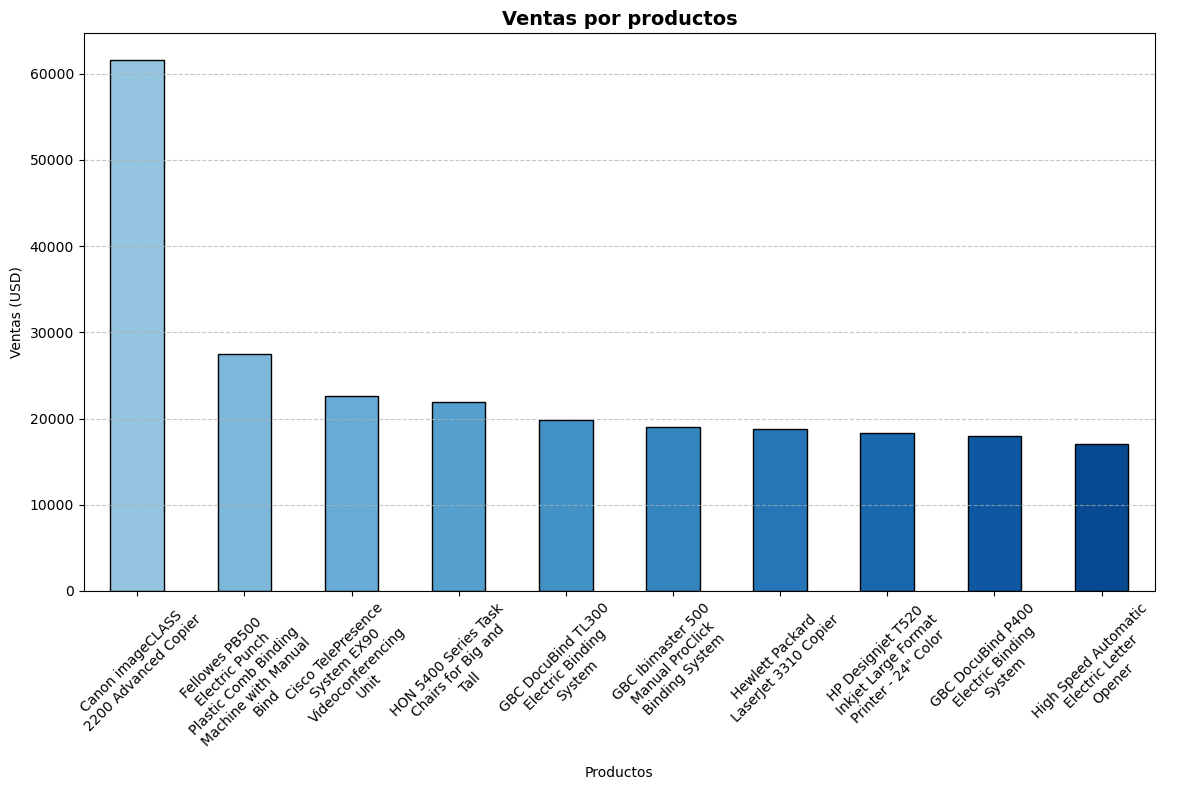

In [42]:
graficar_barras(venta_por_producto,'Ventas por productos','Productos','Ventas (USD)')

### Gráfico estados donde mas compraron Canon imageCLASS 2200 Advanced Copier

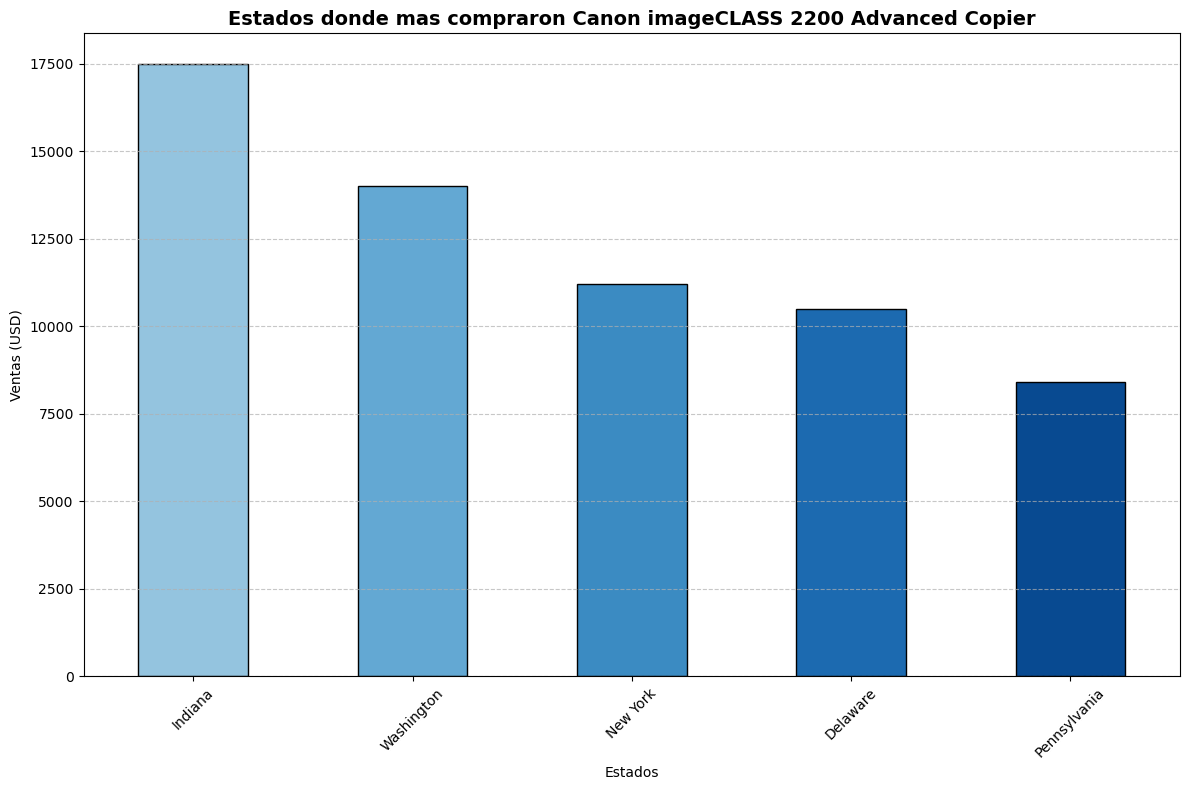

In [44]:
graficar_barras(top_5_canon_imageCLASS,'Estados donde mas compraron Canon imageCLASS 2200 Advanced Copier','Estados','Ventas (USD)')

### Gráfico Top 10 estados con mayor ingresos

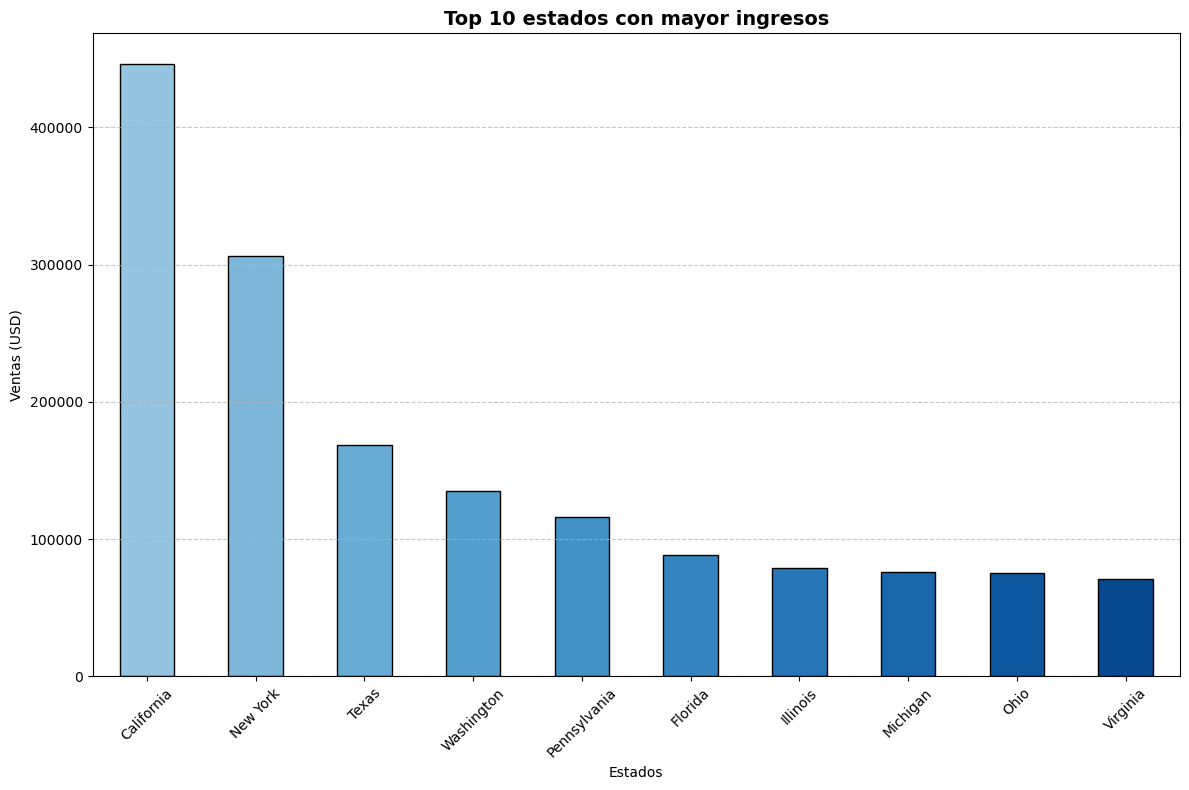

In [46]:
graficar_barras(venta_por_estado,'Top 10 estados con mayor ingresos','Estados','Ventas (USD)')

### Gráfico Top 5 productos que mas compraron en california

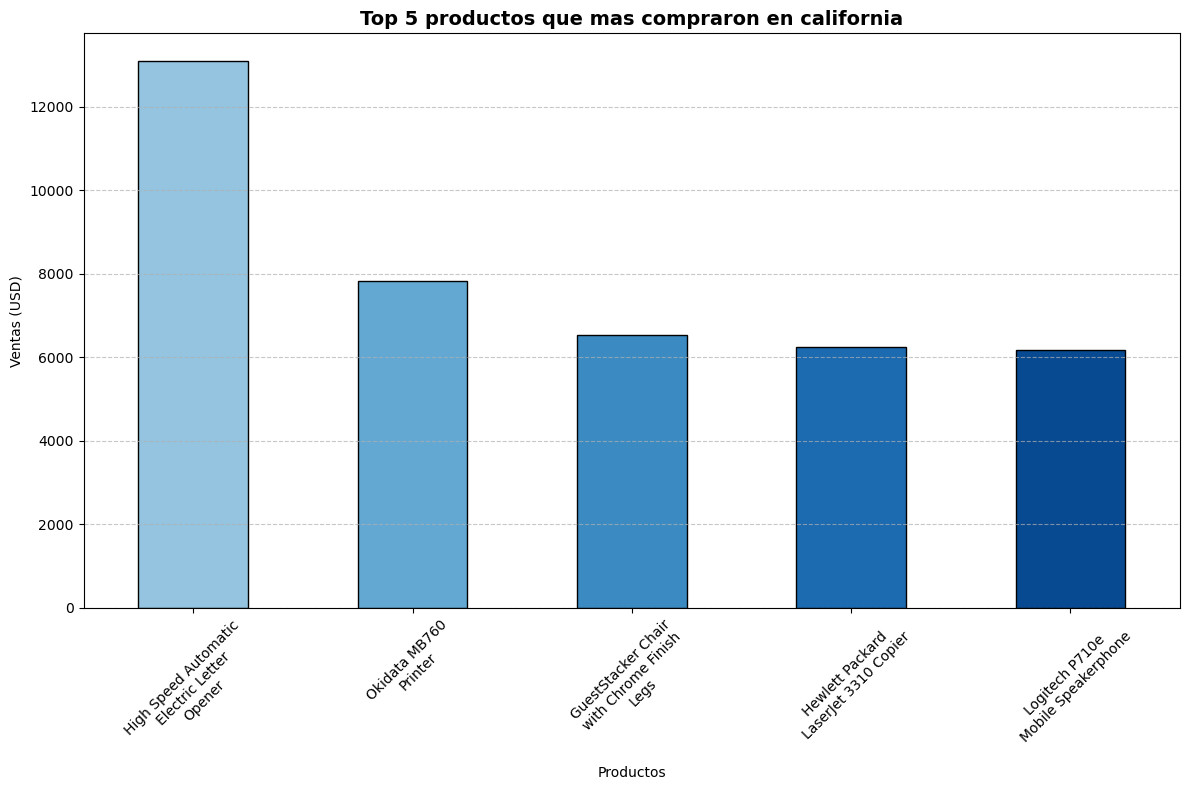

In [48]:
graficar_barras(top_5_california,'Top 5 productos que mas compraron en california','Productos','Ventas (USD)')

### Gráfico top 5 clientes que mas compraron

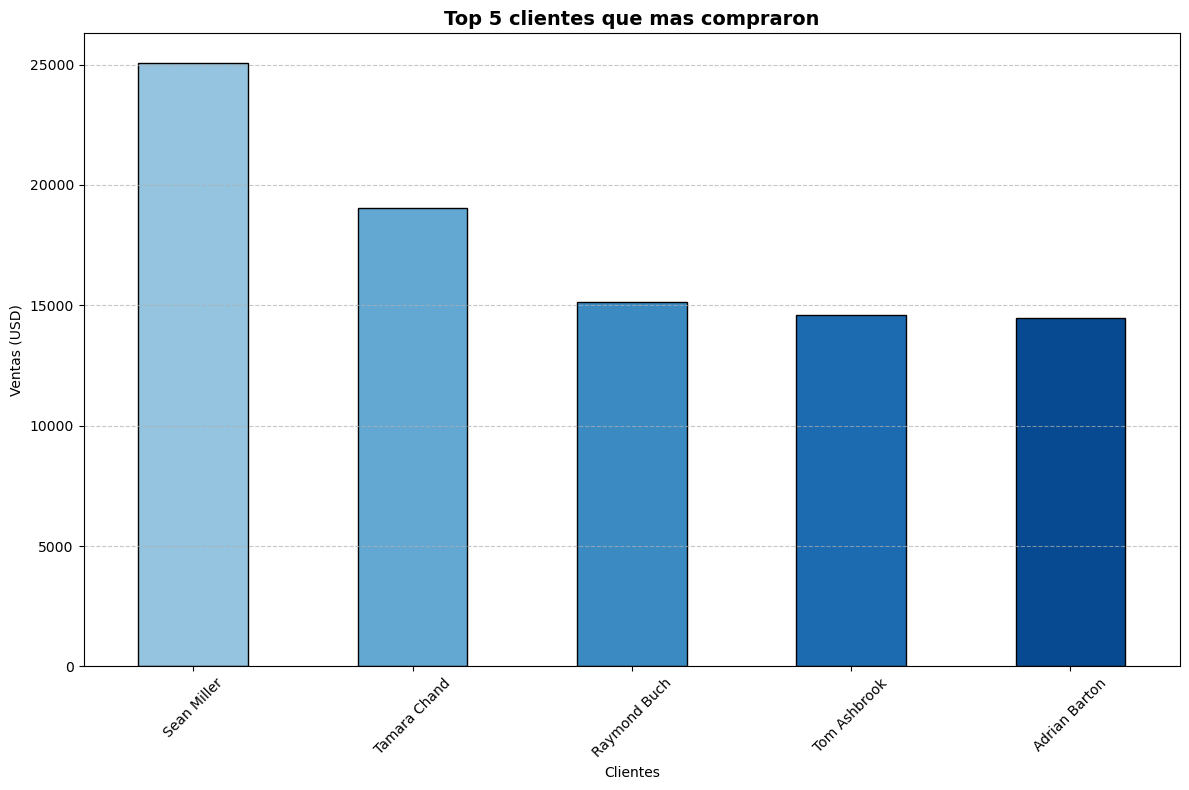

In [50]:
graficar_barras(clientes_top,'Top 5 clientes que mas compraron','Clientes','Ventas (USD)')

### Gráfico promedio de compra por cliente

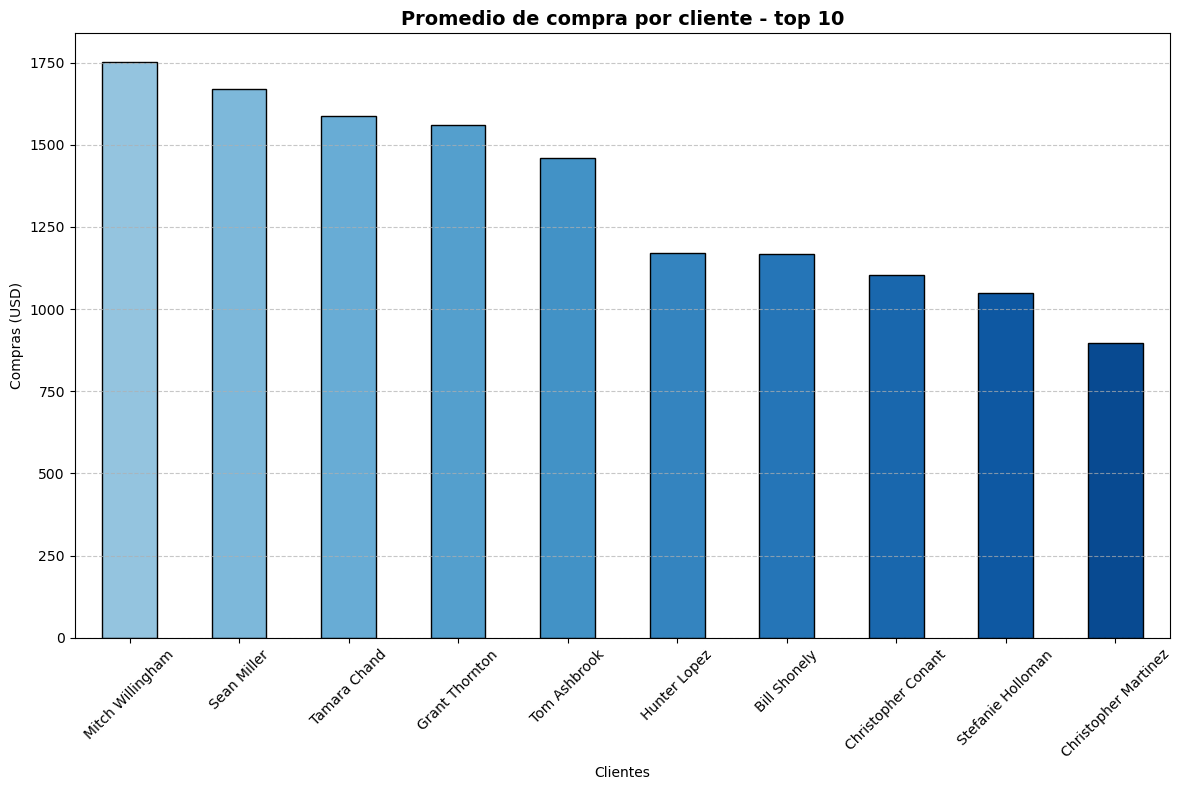

In [52]:
graficar_barras(ticket_promedio,'Promedio de compra por cliente - top 10','Clientes','Compras (USD)')

### Gráfico frecuencia de compra de clientes

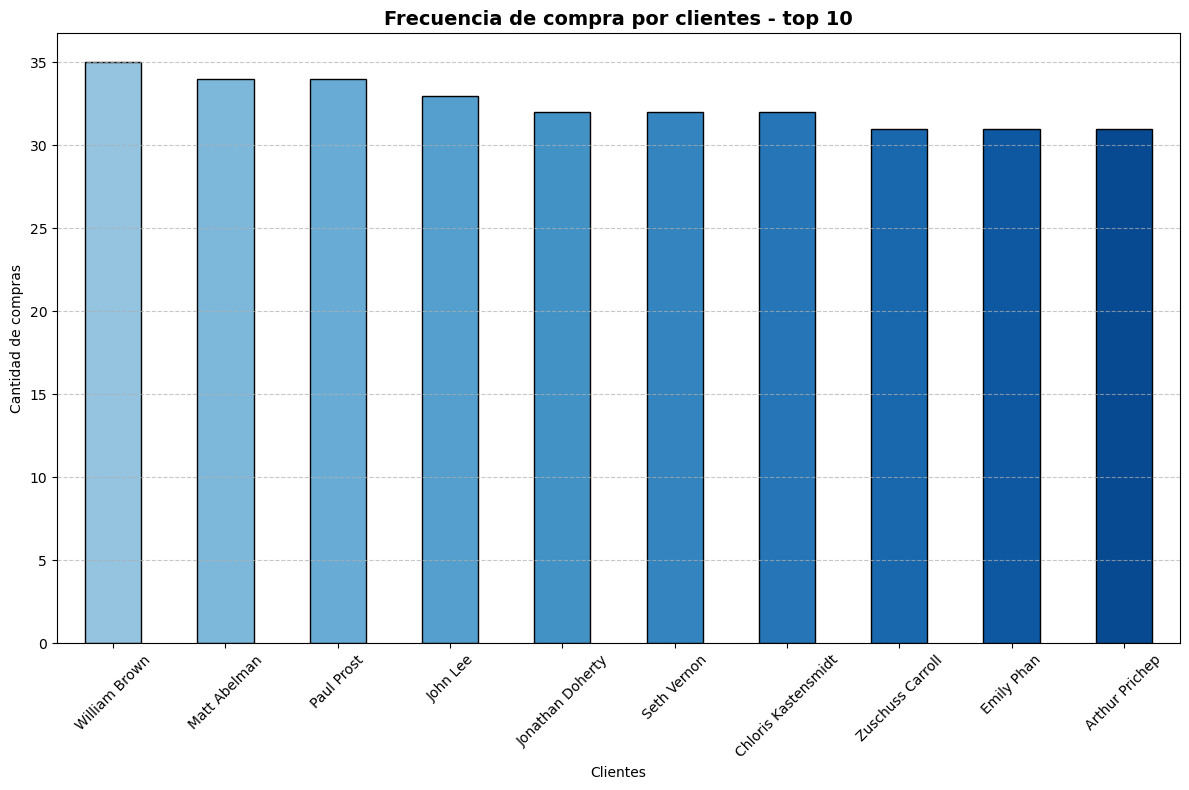

In [54]:
graficar_barras(frecuencia_clientes,'Frecuencia de compra por clientes - top 10','Clientes','Cantidad de compras')

### Gráfico regiones con mas ingresos en ventas

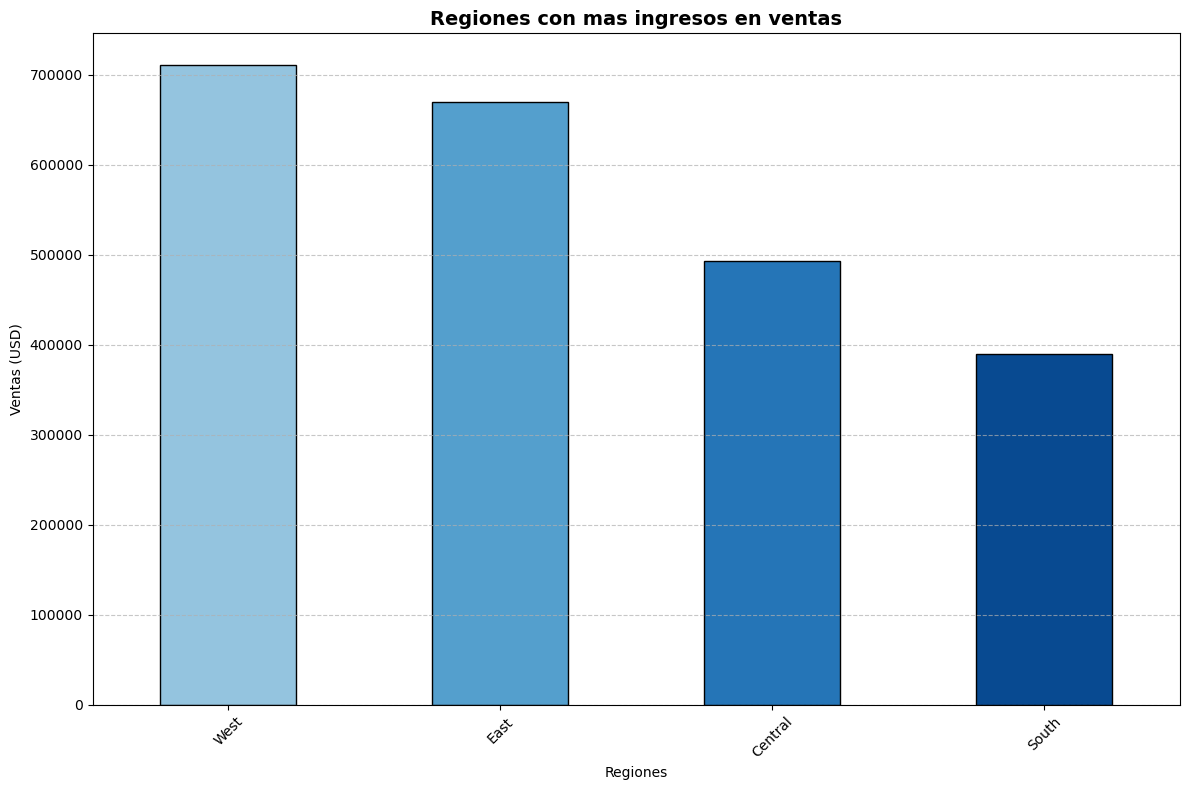

In [56]:
graficar_barras(ventas_por_region,'Regiones con mas ingresos en ventas','Regiones','Ventas (USD)')

### Gráfico categoria mas vendida

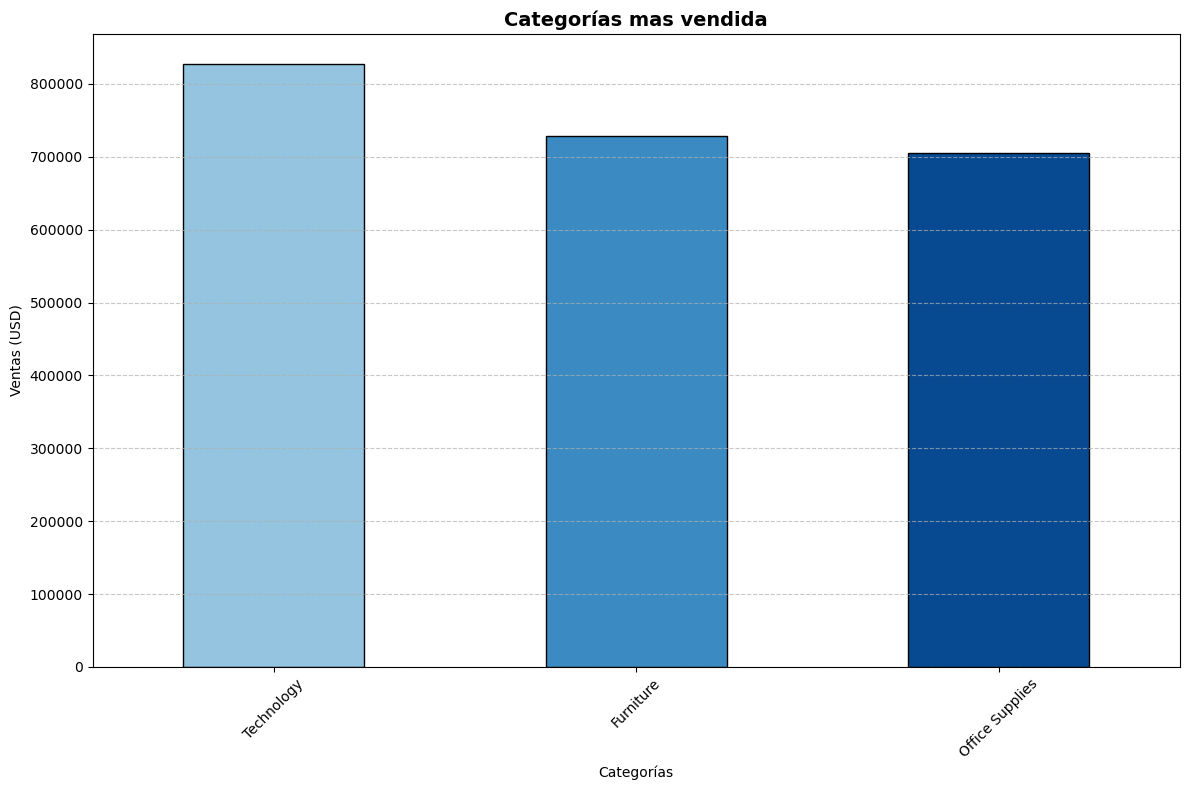

In [58]:
graficar_barras(ventas_por_categoria,'Categorías mas vendida','Categorías','Ventas (USD)')

### Gráficos ventas por año

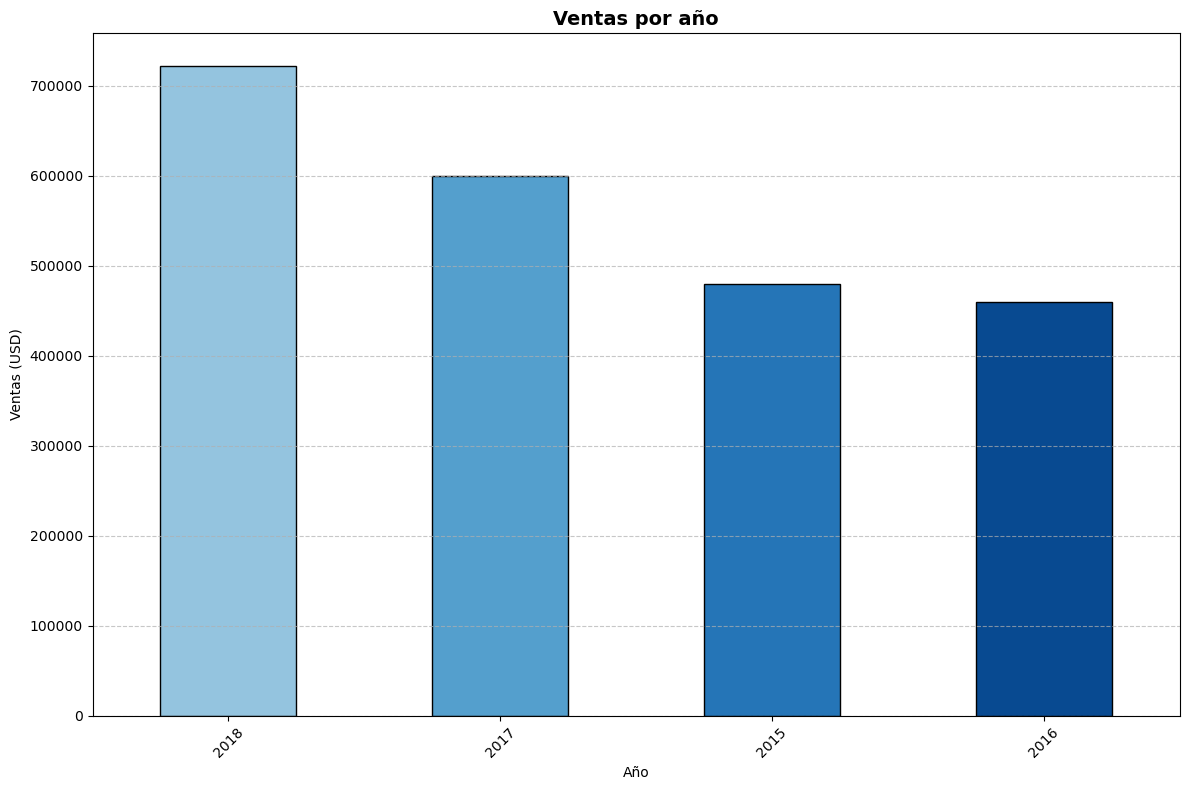

In [60]:
graficar_barras(años_mas_ingresos,'Ventas por año','Año','Ventas (USD)')

### Gráfico ventas por mes

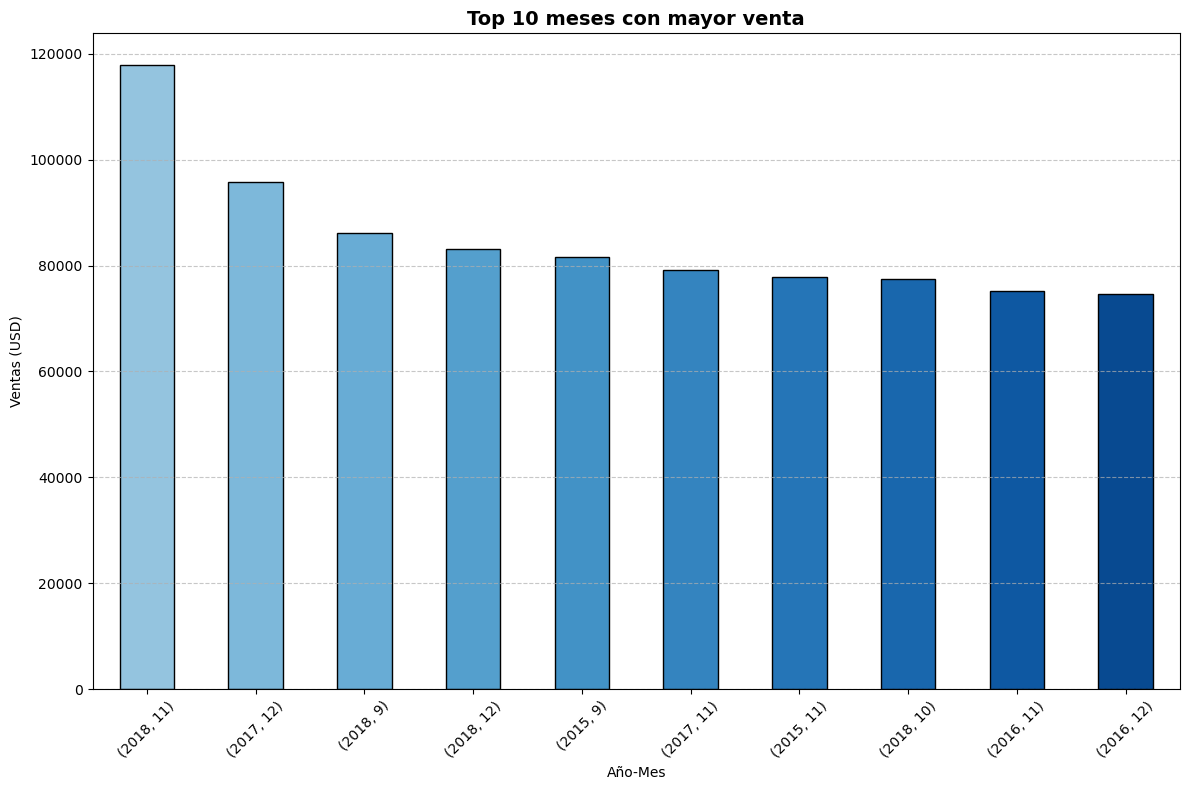

In [62]:
graficar_barras(mes_mayor_ingreso,'Top 10 meses con mayor venta','Año-Mes','Ventas (USD)')

## Insights

## 📊 Principales Hallazgos

### 1. Limpieza de datos
- Se encontraron **11 valores nulos (0.11%)** en la columna `postal_code`. Se decidió mantenerlos por ser un porcentaje insignificante y no afectar análisis posteriores.

### 2. Producto estrella
- **Canon imageCLASS 2200 Advanced Copier** es el producto más vendido del período 2015-2018, con **$61,599 USD** en ingresos (**2.72% del total**).
- Solo 3 productos superan el 1% de participación individual: el Canon, **Fellowes PB500** y **Cisco TelePresence EX90**.

### 3. Distribución geográfica del producto top
- Las mayores ventas del Canon se concentran en:
  - **Indiana:** $17,500 USD
  - **Washington:** $14,000 USD
  - **New York:** $11,200 USD

### 4. Concentración geográfica de ventas
- **California** lidera con **19.73%** de las ventas totales
- **New York** le sigue con **13.55%**
- **Ambos estados representan 1/3 de los ingresos totales** de la empresa

### 5. Productos estrella en California
- El producto más vendido en California es **High Speed Automatic Electric Letter Opener** con **$13,100 USD**
- Duplica en ventas al segundo producto, **Okidata MB760 Printer** ($7,834 USD)

### 6. Clientes top
- Los 5 clientes que más aportan en ingresos son: **Sean Miller, Tamara Chand, Raymond Buch, Tom Ashbrook y Adrian Barton**
- El producto preferido por este grupo es nuevamente el **Canon imageCLASS**

### 7. Ticket promedio por cliente
- Los clientes con mayor ticket promedio son: **Mitch Willingham, Sean Miller y Tamara Chand**

### 8. Desempeño por región
- **Región West** lidera con **$710,220 USD (31.4%)**
- **Región South** es la de menor rendimiento con **$389,151 USD (17.2%)**
- La región top casi **duplica en ventas** a la de menor rendimiento

### 9. Competencia entre categorías
- Las 3 categorías están **muy equilibradas**:
  - **Technology:** $827,456 USD
  - **Furniture:** $728,659 USD  
  - **Office Supplies:** $705,422 USD
- Diferencia de apenas **12 puntos porcentuales** entre la primera y la tercera

### 10. Estacionalidad y mejor mes
- **2018** fue el mejor año con **$722,052 USD**
- **Noviembre 2018** es el mejor mes histórico: **$117,938 USD**

### 11. Evolución anual
- **2016** tuvo una leve caída del **-4.26%** vs 2015
- **2017** se recupera fuertemente: **+30.64%**
- **2018** continúa el crecimiento: **+20.30%**
- **Crecimiento acumulado 2015-2018: +50%+**

### 12. Análisis especial: Noviembre
- Noviembre sigue la misma tendencia anual:
  - **2016:** Caída del **-3.41%**
  - **2017:** Leve recuperación **+5.07%**
  - **2018:** **¡EXPLOSIÓN DEL 49.16%!**
- Este crecimiento explica gran parte del éxito de 2018